# This notebook contains example processing of global data using globdata module

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import globdata as gd
import warnings
warnings.filterwarnings('ignore')


files_list_3 = ['MERRA2_400.tavg1_2d_flx_Nx.20220428.nc4',
              'MERRA2_400.tavg1_2d_flx_Nx.20220429.nc4',
              'MERRA2_400.tavg1_2d_flx_Nx.20220430.nc4']

files_list_1 = ['MERRA2_400.tavg1_2d_flx_Nx.20220430.nc4']

vars_interest_list = ['evaporation_from_turbulence',
                      'areal_fraction_of_nonanvil_large_scale_showers',
                      'sensible_heat_flux_from_turbulence', 
                      'total_precipitation', 'surface_air_temperature', 'surface_moisture_scale']

### Part 0 - get all names of parameters (variables)

In [2]:
ds = gd.DataSet('MERRA2_400.tavg1_2d_flx_Nx.20220430.nc4')
print(ds.get_var_dict())
ds.release()

{'longitude': 'lon', 'latitude': 'lat', 'time': 'time', 'surface_bouyancy_scale': 'BSTAR', 'surface_exchange_coefficient_for_heat': 'CDH', 'surface_exchange_coefficient_for_momentum': 'CDM', 'surface_exchange_coefficient_for_moisture': 'CDQ', 'surface_neutral_drag_coefficient': 'CN', 'zero_plane_displacement_height': 'DISPH', 'total_latent_energy_flux': 'EFLUX', 'evaporation_from_turbulence': 'EVAP', 'areal_fraction_of_anvil_showers': 'FRCAN', 'areal_fraction_of_convective_showers': 'FRCCN', 'areal_fraction_of_nonanvil_large_scale_showers': 'FRCLS', 'ice_covered_fraction_of_tile': 'FRSEAICE', 'Ground_heating_for_skin_temp': 'GHTSKIN', 'sensible_heat_flux_from_turbulence': 'HFLUX', 'surface_layer_height': 'HLML', 'surface_downwelling_nearinfrared_diffuse_flux': 'NIRDF', 'surface_downwelling_nearinfrared_beam_flux': 'NIRDR', 'planetary_boundary_layer_height': 'PBLH', 'Total_column_production_of_precipitation': 'PGENTOT', 'anvil_precipitation': 'PRECANV', 'convective_precipitation': 'PREC

### Part 1 - processing timeseries for one day and different variables (Middle East and Texas)

Text(0.5, 1.0, 'Pearson Correlation for MiddEast')

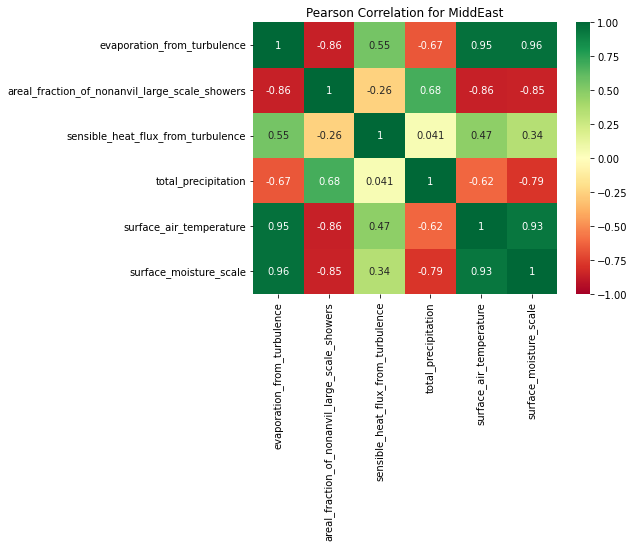

In [3]:
dloader = gd.DataLoader()
# time series for all interesting variables for Middle East
df_time_day_me = dloader.time_series(files_list_1, 32.5, 35, vars_interest_list, cache = True, as_numpy = False)
# time series for all interesting variables for Texas
df_time_day_tx = dloader.time_series(files_list_1, 32.5, 100, vars_interest_list, cache = True, as_numpy = False)

# correlation matrix
corr_spearman_me = df_time_day_me[vars_interest_list].corr(method='spearman')
corr_spearman_tx = df_time_day_tx[vars_interest_list].corr(method='spearman')

plt.figure(figsize=(15,5))
ax1 = plt.subplot(1,2,1)
sns.heatmap(corr_spearman_me, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Pearson Correlation for MiddEast')


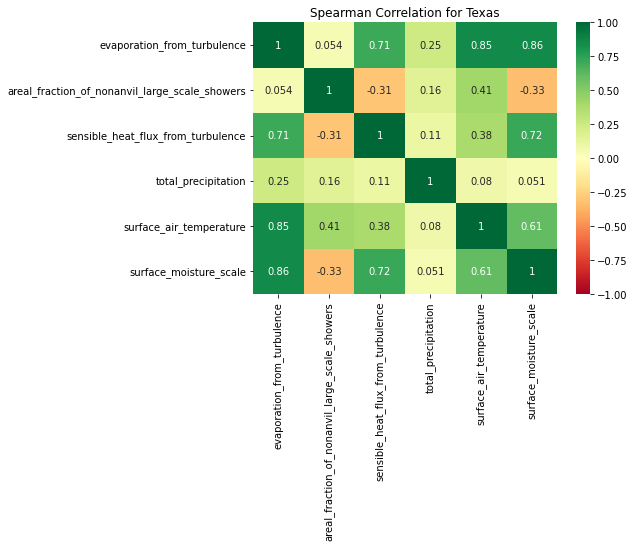

In [4]:
plt.figure(figsize=(15,5))
ax2 = plt.subplot(1,2,2, sharex=ax1)
sns.heatmap(corr_spearman_tx, annot=True, cmap='RdYlGn', vmin=-1, vmax=+1)
plt.title('Spearman Correlation for Texas')
plt.show()

There is a strong correlation between air temperature and evaporation from turbulence both in Middle East and Texas. Another strong correlation in two places is between moisture and air temperature.
Some correlation can be also observed for air temperature and heat flux from turbulence
Areal fraction of nonanvil showers has a contraversal correlation in two places

## Part 2 - Processing data from multiple datasets (3 days)

In [5]:
# Lets calculate average temperature at midnight worldwide in these three days
temp_df = dloader.time_slice_daily(files_list_3, 0, 'surface_air_temperature', cache=True)

temp_avg = list()
for i, filename in enumerate(files_list_3):
    avg_t = temp_df.loc[temp_df.FileName == filename]['surface_air_temperature'].mean()
    day_n = i
    temp_avg.append((day_n,avg_t))

temp_arr = np.array(temp_avg)
print(np.corrcoef(temp_arr[:,0],temp_arr[:,1]))

[[1.         0.97170609]
 [0.97170609 1.        ]]


World temperature is growing day by day - a very strong correlation, this seems to be a Global Warming